In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
def get_type(sheet_name='All properties'):
    df = pd.read_excel("Moving+annual+rent+by+suburb+-+March+quarter+2023+(3).xlsx",
                   header=None, sheet_name=sheet_name).iloc[1:]
    df.iloc[0].ffill(inplace=True)
    first_row = df.iloc[0]
    second_row = df.iloc[1]
    combined = first_row + second_row
    df.columns=combined
    df = df[2:]
    columns_tmp = df.columns.to_list()
    new_col = ['big', 'suburb']
    new_col.extend(columns_tmp[2:])
    df.columns = new_col
    df['big'].ffill(inplace=True)
    return df

In [3]:

df = get_type()
df.isna().sum()


big               0
suburb            0
Mar 2000Count     0
Mar 2000Median    0
Jun 2000Count     0
                 ..
Sep 2022Median    0
Dec 2022Count     0
Dec 2022Median    0
Mar 2023Count     0
Mar 2023Median    0
Length: 188, dtype: int64

In [4]:
import re

def select_year_columns(columns, start_year, end_year, which):
    # Define a pattern to match the year in the column names
    if which == 'Median':
        pattern = re.compile(r'(\d{4})Median')
    else:
        pattern = re.compile(r'(\d{4})Count')

    selected_columns = []
    for col in columns:
        match = pattern.search(col)
        if match:
            year = int(match.group(1))
            if start_year <= year <= end_year:
                selected_columns.append(col)

    return selected_columns


# select columns between 2000 and 2023
selected_columns = select_year_columns(df.columns, 2000, 2023, 'Median')


In [5]:
plot_df = df[['big'] + selected_columns]
plot_df

,big,Mar 2000Median,Jun 2000Median,Sep 2000Median,Dec 2000Median,Mar 2001Median,Jun 2001Median,Sep 2001Median,Dec 2001Median,Mar 2002Median,...,Dec 2020Median,Mar 2021Median,Jun 2021Median,Sep 2021Median,Dec 2021Median,Mar 2022Median,Jun 2022Median,Sep 2022Median,Dec 2022Median,Mar 2023Median
3,Inner Melbourne,260,260,270,275,275,280,280,290,300,...,550,500,500,500,495,500,515,500,525,545
4,Inner Melbourne,200,200,205,210,215,220,225,230,233,...,495,450,440,425,420,430,450,450,460,490
5,Inner Melbourne,260,260,265,270,270,275,280,280,290,...,590,580,575,575,580,580,595,600,600,620
6,Inner Melbourne,260,260,260,260,260,260,265,270,270,...,395,350,340,330,320,310,319,340,350,400
7,Inner Melbourne,320,320,320,320,320,320,320,320,320,...,420,380,369,350,350,365,390,419,450,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Other Regional Centres,125,125,130,130,130,130,130,135,135,...,308,320,330,350,360,370,380,380,380,380
158,Other Regional Centres,130,135,135,135,135,135,140,140,150,...,380,375,380,390,390,400,400,420,430,440
159,Other Regional Centres,130,135,135,135,140,140,140,145,145,...,350,350,360,370,380,400,400,420,420,420
160,Other Regional Centres,145,145,150,150,150,150,150,150,150,...,330,340,350,360,370,380,390,400,410,410


# Median properties Prices Over Time by Big Suburb

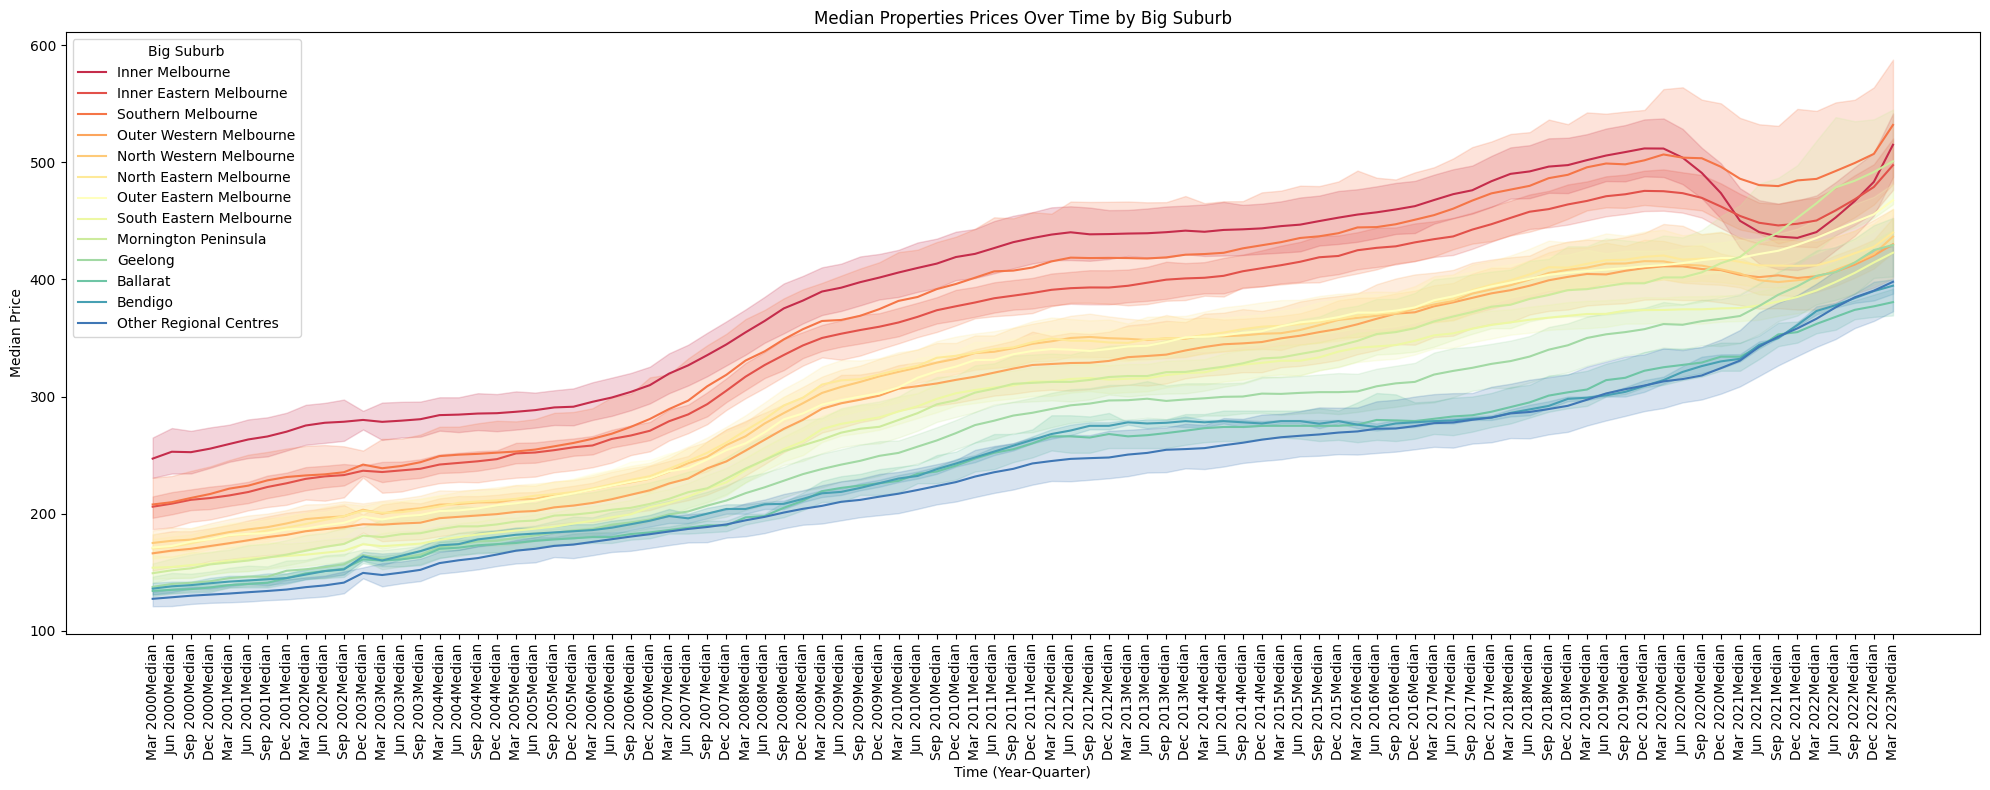

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_long = pd.melt(plot_df, id_vars=['big'], var_name='YearQuarter', value_name='MedianPrice')
df_long['MedianPrice'] = pd.to_numeric(df_long['MedianPrice'], errors='coerce')
# Plotting the data with seaborn
plt.figure(figsize=(20, 8))

palette = sns.color_palette("Spectral", len(plot_df['big'].unique()))

sns.lineplot(data=df_long, x='YearQuarter', y='MedianPrice', 
             hue='big', palette=palette)

# Set plot labels and title
plt.xticks(rotation=90)
plt.title('Median Properties Prices Over Time by Big Suburb')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Median Price')
plt.legend(title='Big Suburb', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [7]:
# 2023 year 
selected_2023 = select_year_columns(df.columns, 2023, 2023, 'Median')

suburb_df = df[['suburb'] + selected_2023]
suburb_df

,suburb,Mar 2023Median
3,Albert Park-Middle Park-West St Kilda,545
4,Armadale,490
5,Carlton North,620
6,Carlton-Parkville,400
7,CBD-St Kilda Rd,500
...,...,...
157,Wanagaratta,380
158,Warragul,440
159,Warrnambool,420
160,Wodonga,410


# Median Properties Prices Over Mar 2023 by Suburb

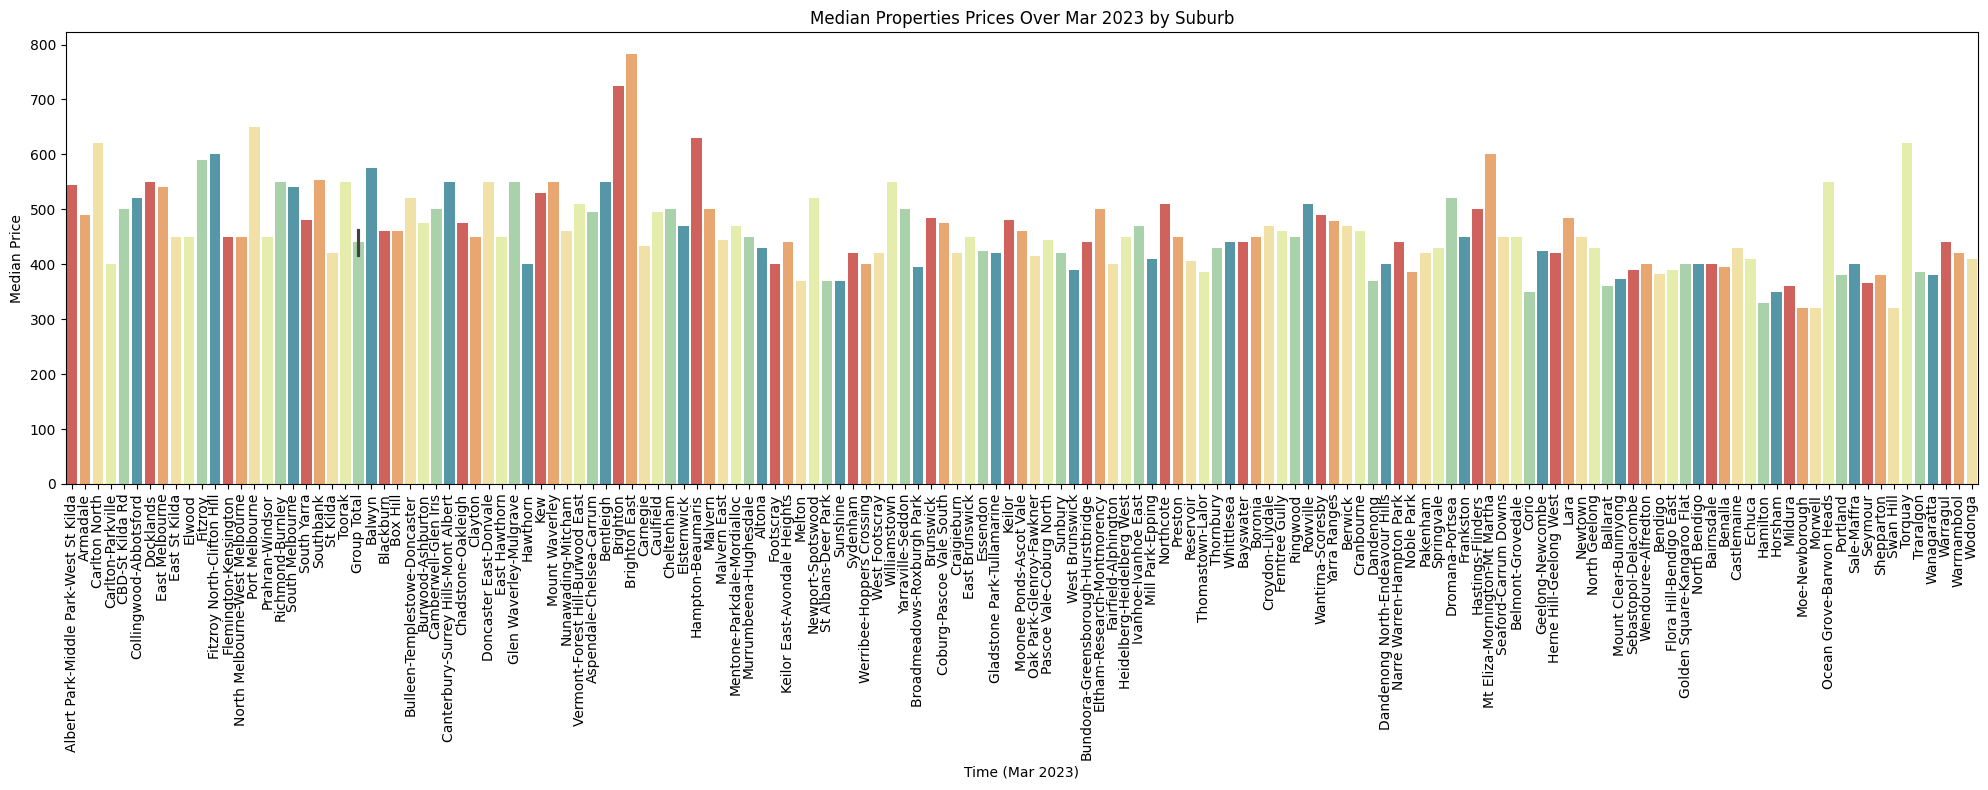

In [8]:
plt.figure(figsize=(20, 8))

palette = sns.color_palette("Spectral")
sns.barplot(data=suburb_df, x='suburb', y='Mar 2023Median', 
            palette=palette)
plt.xticks(rotation=90)
plt.title('Median Properties Prices Over Mar 2023 by Suburb')
plt.xlabel('Time (Mar 2023)')
plt.ylabel('Median Price')

# Display the plot
plt.tight_layout()
plt.show()


# Mean house

In [9]:
df1flat = get_type(sheet_name='1 bedroom flat')
df2flat = get_type(sheet_name='2 bedroom flat')
df3flat = get_type(sheet_name='3 bedroom flat')

df2house = get_type(sheet_name='2 bedroom house')
df3house = get_type(sheet_name='3 bedroom house')
df4house = get_type(sheet_name='4 bedroom house')



In [10]:
a = df1flat[['suburb', 'Mar 2023Median']]
b = df2flat[['suburb', 'Mar 2023Median']]
c = df3flat[['suburb', 'Mar 2023Median']]

d = df2house[['suburb', 'Mar 2023Median']]
e = df3house[['suburb', 'Mar 2023Median']]
f = df4house[['suburb', 'Mar 2023Median']]

In [14]:
diff_df = pd.merge(a, b, on='suburb', suffixes=['1flat', '2flat'])
diff_df = pd.merge(diff_df, c, on='suburb')
diff_df = pd.merge(diff_df, d, on='suburb', suffixes=['3flat', '2house'])
diff_df = pd.merge(diff_df, e, on='suburb')
diff_df = pd.merge(diff_df, f, on='suburb', suffixes=['3house', '4house'])
diff_df = diff_df.drop_duplicates()
diff_df['suburb'] = diff_df['suburb'].drop_duplicates()
diff_df = diff_df.dropna()
diff_df = diff_df.reset_index()
diff_df = diff_df.drop(columns=['index'])
col = ['Mar 2023Median1flat', 'Mar 2023Median2flat',
       'Mar 2023Median3flat', 'Mar 2023Median2house', 
       'Mar 2023Median3house',
       'Mar 2023Median4house']
for c in col:
       diff_df[c] = pd.to_numeric(diff_df[c], errors='coerce')
diff_df

,suburb,Mar 2023Median1flat,Mar 2023Median2flat,Mar 2023Median3flat,Mar 2023Median2house,Mar 2023Median3house,Mar 2023Median4house
0,Albert Park-Middle Park-West St Kilda,360.0,515.0,730.0,650.0,1000.0,1300.0
1,Armadale,360.0,485.0,685.0,675.0,973.0,1200.0
2,Carlton North,373.0,480.0,650.0,633.0,780.0,1100.0
3,Carlton-Parkville,352.0,530.0,650.0,580.0,783.0,1000.0
4,CBD-St Kilda Rd,430.0,600.0,900.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
142,Traralgon,260.0,320.0,395.0,345.0,400.0,490.0
143,Wanagaratta,220.0,300.0,410.0,350.0,420.0,500.0
144,Warragul,NaN,340.0,370.0,360.0,413.0,485.0
145,Warrnambool,250.0,350.0,460.0,400.0,450.0,550.0


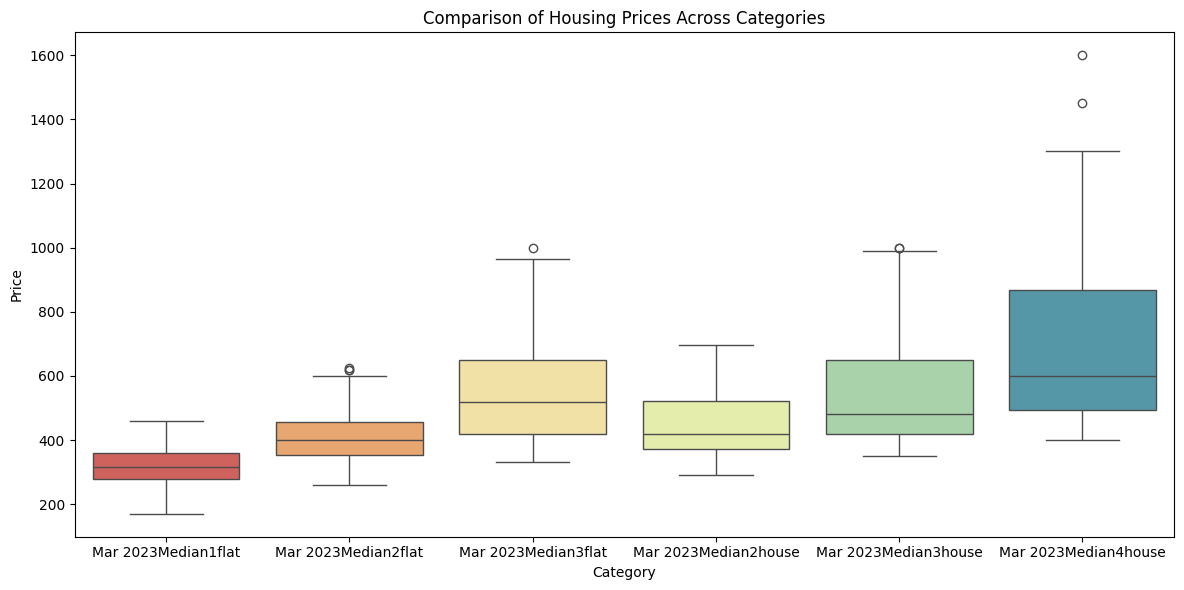

In [19]:
df_melted = diff_df.melt(id_vars=['suburb'], 
                    value_vars=col, 
                    var_name='Category', value_name='Price')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df_melted, palette=palette)
plt.title('Comparison of Housing Prices Across Categories')
plt.tight_layout()
plt.show()

# Domain

In [79]:
do_df = pd.read_csv("domain.csv")
price_df = do_df[['price', 'addressSuburb']]

In [80]:
price_df.isna().sum()

price            6
addressSuburb    0
dtype: int64

In [81]:
len(price_df)

8292

## drop na

In [82]:
price_df = price_df.dropna()

In [83]:
# Use regex to extract the number from the 'Rent' column
price_df['price'] = price_df['price'].str.extract(r'(\d+)').astype(float)
price_df = price_df.dropna()
price_df


,price,addressSuburb
0,500.0,WEST MELBOURNE
1,540.0,WEST MELBOURNE
2,650.0,WEST MELBOURNE
3,560.0,WEST MELBOURNE
4,600.0,WEST MELBOURNE
...,...,...
8287,470.0,TRUGANINA
8288,600.0,MANOR LAKES
8289,575.0,TARNEIT
8290,530.0,TARNEIT


In [84]:
price_df['price'].isna().sum()

0

## Outlier

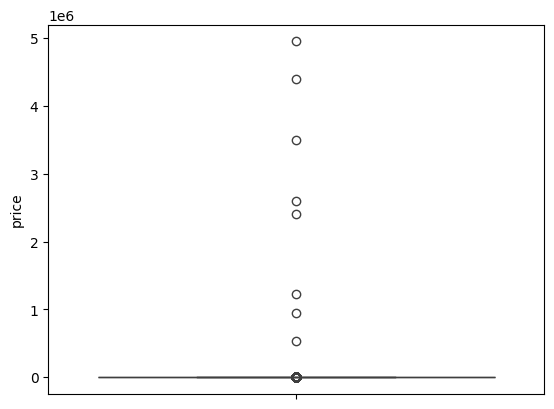

In [85]:
sns.boxplot(price_df['price'])
plt.show()

In [86]:
price_df[price_df['price']>10000]

,price,addressSuburb
4175,2400000.0,FITZROY
4176,2600000.0,FITZROY
4177,4950000.0,FITZROY
4178,4400000.0,FITZROY
4179,3500000.0,FITZROY
4247,1230000.0,MELBOURNE
4623,530000.0,CARLTON
4626,952750.0,MELBOURNE


## Price less than 10000

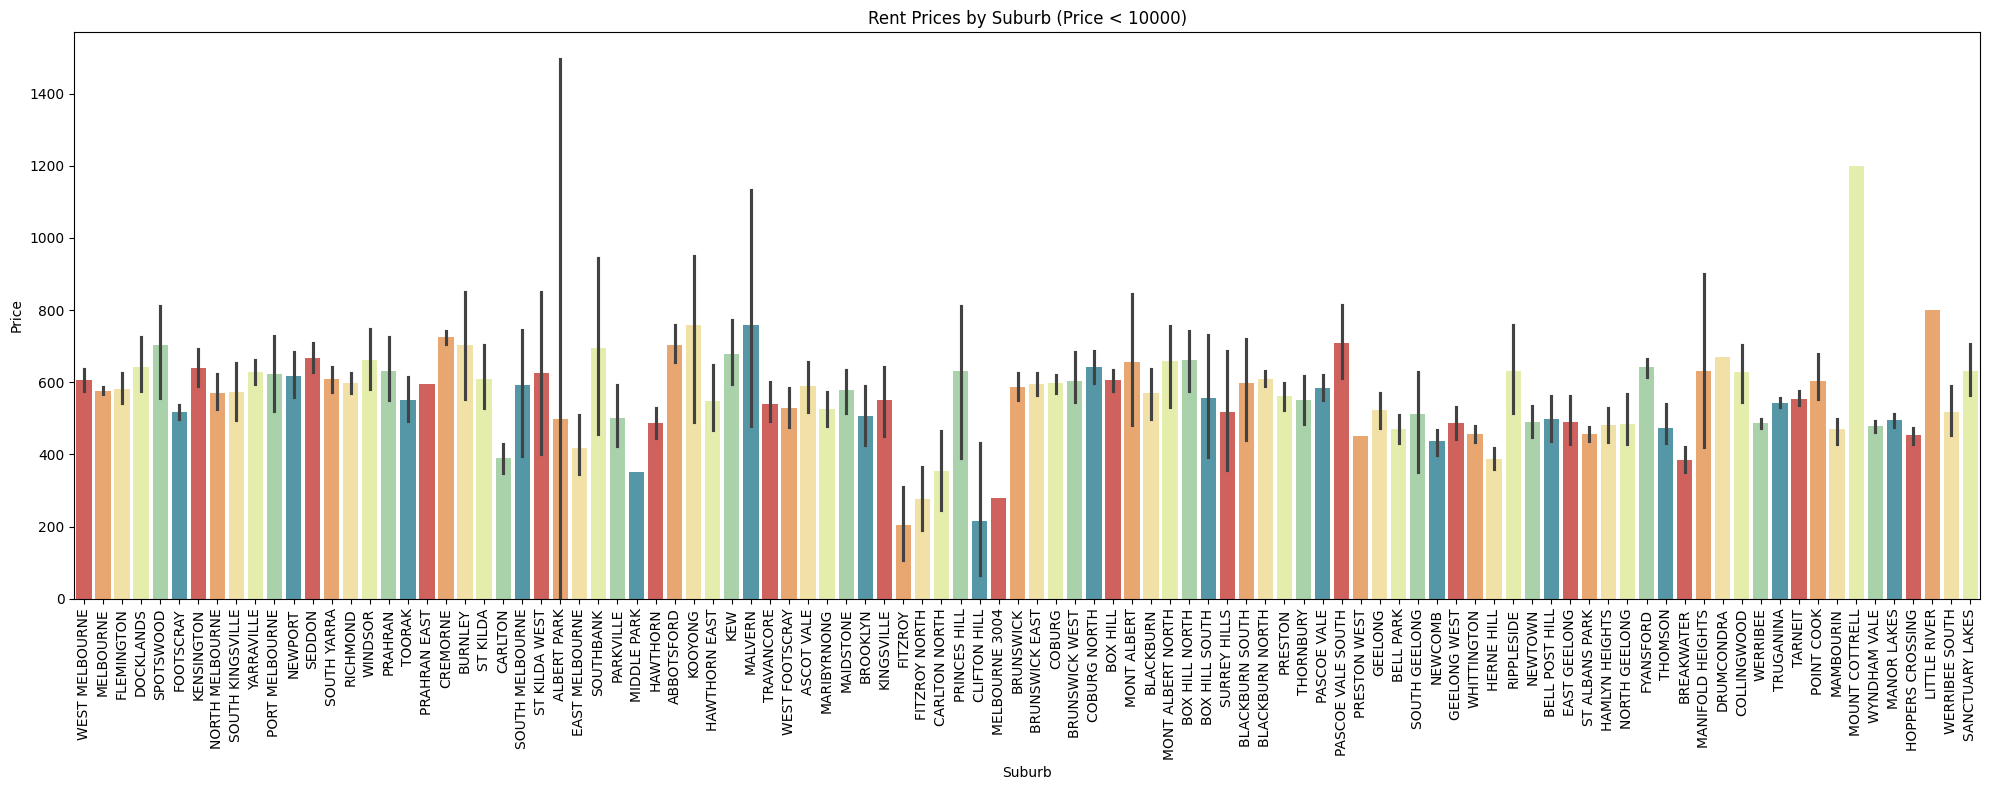

In [89]:


plt.figure(figsize=(20, 8))

palette = sns.color_palette("Spectral")
sns.barplot(data=price_df[price_df['price']<10000], x='addressSuburb', y='price', 
            palette=palette)
plt.xticks(rotation=90)
plt.title('Rent Prices by Suburb (Price < 10000)')
plt.xlabel('Suburb')
plt.ylabel('Price')

# Display the plot
plt.tight_layout()
plt.show()

## Average

In [92]:
price_df.groupby('addressSuburb').mean().to_csv('avg.csv', index=False)